### Libraries and Modules

In [337]:
import math # for sqrt, log, exponentials
import numpy as np # for vectorization and array
import random # for random simulation
import pandas as pd # for dataframe visualization
import matplotlib.pyplot as plt # for plotting data in a graph
import copy # for making predictions
from collections import OrderedDict # ordering dictionaries
from PIL import Image # for reading images
from PIL import ImageFilter # for image augmentation
import warnings # no annoying warnings
import os # to get the current directory
import matplotlib.image as mpimg # displaying images
from matplotlib import rcParams # parameter tuning

%matplotlib inline

cwd = os.getcwd() # current working directory
warnings.filterwarnings('ignore') # to ignore numpy's warnings
rcParams['figure.figsize'] = 6, 4 # graph size

# System 1 & 2 Code

In [322]:
def get_data(color, set_type, method, image):
    """
    Parameters:
    color - a string the tells us what training
    data we are collecting for a certain r,g,b color
    
    set_type - a string that tells us if we want
    the training or testing data
    
    method - a string representation of SGD
    or descision trees
    
    image - a string denoting if we should use
    leaves or wood
    
    Returns:
    All of the training sets, so
    x_train, y_train, y_train_sigmoid
    
    Purpose:
    To collect data about all the pixels and label
    a 1 IF a pixel is mostly that color and a 0 if 
    it is not
    """
    # reformatting the strings
    if color != None:
        color = color.strip().lower()
    set_type = set_type.strip().lower()
    method = method.strip().lower()
    image = image.strip().lower()
    
    # getting the corresponding color index
    # depending on the color parameter
    if color == 'red':
        color_index = 0
    elif color == 'green':
        color_index = 1
    elif color == 'blue':
        color_index = 2
        
    if color == None:
        color_index = -1
        
    # intialize arrays to hold data
    x_train = np.array([])
    y_train = np.array([])

    # all of our training / testing images - leaves
    if image == "leaf":
        if set_type == 'train':
            images = ["leaf_train_1","leaf_train_3","leaf_train_1_vertical_flip",
                      "leaf_train_3_vertical_flip","leaf_train_2","leaf_train_4"]
        elif set_type == 'test':
            images = ["leaf_test_1","leaf_test_2","leaf_test_3","leaf_test_4"]
            
    elif image == 'wood':
        if set_type == 'train':
            images = ["wood_train_1","wood_train_2","wood_train_3"]
        elif set_type == 'test':
            images = ["wood_test_1","wood_test_2","wood_test_3","wood_test_4"]

    # looping through images
    for directory in images:

        # getting the rgb values from leaves
        rgb_leaves = get_image_rgb(directory)

        # partitioning the rgb values in groups - column wise on the image (left to right)
        rgb_leaves_partitioned = np.array(np.split(rgb_leaves, 900*NUM_COLUMNS))

        # temp arrays to hold imformation about the image we are iterating over
        x_temp = []
        y_temp = []

        # getting our training data from an image
        for index in range(0,len(rgb_leaves_partitioned)):

            # getting the data from the partitioned data
            data = rgb_leaves_partitioned[index]

            # adding every other column
            if index % 2 == 0:
                # unpacking data into one long vector
                x_temp.append(np.matrix.flatten(data))
            else:
                # iterating through all the values
                for values in data:

                    values = list(values) # converting values to a list
                    max_val = max(values) # getting max val
                    max_index = values.index(max_val) # getting the max index from the max val

                if method == 'sgd':
                    # checking for that color
                    # this is where the labeling of 
                    # the y-data points happen
                    if max_index == color_index:
                        y_temp.append(1)
                    else:
                        y_temp.append(0)
                elif method == 'tree':
                    y_temp.append(max_val)

        x_temp = np.array(x_temp) # normalizing x_train
        y_temp = np.array(y_temp) # converting y_train to a numpy array

        # this is our first data point
        if x_train.shape[0] == 0:
            x_train = copy.deepcopy(x_temp)
            y_train = copy.deepcopy(y_temp)
        else: 
            x_train = np.row_stack((x_train, x_temp))
            y_train = np.append(y_train, y_temp)

    x_train = x_train / 255. # preprocessing data 
    y_train_sigmoid = sigmoid_prediction(x_train) # transforming data

    if method == 'sgd':
        # retrurning the sets based off of the 
        # function's parameters
        if set_type == 'train':
            return x_train, y_train, y_train_sigmoid
        elif set_type == 'test':
            return x_train, y_train
    else:
        return x_train, y_train
    
def get_directory(directory):
    """
    Parameters - a string that specifies what image
    we want to grab
    
    Returns:
    directory - the directory we want to access
    
    Purpose:
    To easily grab the directories of
    the images
    """
    directory = directory.lower().strip()
    
    # getting directory for images with hole
    if 'leaves' == directory:
        directory = str(cwd) + r"/Images/Leaves_Masked.jpg"
    elif 'wood' == directory:
        directory = str(cwd) + r"/Images/Wood_Masked.jpg"
    
    # getting directory to put our results into
    if 'leaves_result' == directory:
        directory = str(cwd) + r"\Final Results\Leaves.jpg"
    elif 'wood_result' == directory:
        directory = str(cwd) + r"\Final Results\Wood.jpg"
        
    # training images for leaves
    elif directory == 'leaf_train_1':
        directory = str(cwd) + r"/Leaves_train/leaf_train_1.jpg"
    elif directory == 'leaf_train_2':
        directory = str(cwd) + r"/Leaves_train/leaf_train_2.jpg"
    elif directory == 'leaf_train_3':
        directory = str(cwd) + r"/Leaves_train/leaf_train_3.jpg"
    elif directory == 'leaf_train_1_vertical_flip':
        directory = str(cwd) + r"/Leaves_train/leaf_train_3_vertical_flip.jpg"
    elif directory == 'leaf_train_3_vertical_flip':
        directory = str(cwd) + r"/Leaves_train/leaf_train_3_vertical_flip.jpg"
    elif directory == 'leaf_train_4':
        directory = str(cwd) + r"/Leaves_train/leaf_train_4.jpg"
        
    # testing images for leaves
    elif directory == "leaf_test_1":
        directory = str(cwd) + r"/Leaves_test/leaf_test_1.jpg"
    elif directory == "leaf_test_2":
        directory = str(cwd) + r"/Leaves_test/leaf_test_2.jpg"
    elif directory == "leaf_test_3":
        directory = str(cwd) + r"/Leaves_test/leaf_test_3.jpg"
    elif directory == "leaf_test_4":
        directory = str(cwd) + r"/Leaves_test/leaf_test_4.jpg"
        
    # training images for wood
    elif directory == "wood_train_1":
        directory = str(cwd) + r"/Wood_train/wood_train_1.jpg"
    elif directory == "wood_train_2":
        directory = str(cwd) + r"/Wood_train/wood_train_2.jpg"
    elif directory == "wood_train_3":
        directory = str(cwd) + r"/Wood_train/wood_train_3.jpg"
    
    # testing images for wood
    elif directory == "wood_test_1":
        directory = str(cwd) + r"/Wood_test/wood_test_1.jpg"
    elif directory == "wood_test_2":
        directory = str(cwd) + r"/Wood_test/wood_test_2.jpg"
    elif directory == "wood_test_3":
        directory = str(cwd) + r"/Wood_test/wood_test_3.jpg"
    elif directory == "wood_test_4":
        directory = str(cwd) + r"/Wood_test/wood_test_4.jpg"
        
    return directory

def get_image_rgb(directory):
    """
    Parameters:
    directory - a string that specifies what image
    we want to grab
    
    Returns:
    rgb_array - a ((1 x 3) x lw) ndarray that contrains
    r, g, b values
    
    Purpose:
    To get the rgb values of any image
    """
    
    # get the directory
    directory = get_directory(directory)
    
    # Open an image file
    im = Image.open(directory)

    # Load the pixel data into a variable
    # so we can iterating over it
    pixels = im.load()
    
    # Get the size of the image
    width, height = im.size

    # intialize a list to hold all of these values
    rgb_array = list(range(width * height))
    
    # Iterate over all the pixels
    index = -1 # for indexing
    for x in range(width):
        for y in range(height):
            index += 1 # incrementing index by one
            
            # Get the RGB values of the pixel
            r, g, b = pixels[x, y]

            # add each r g b value to the list
            rgb_array[index] = np.array([r, g, b])
            
    # return and convert it to an array
    return np.array(rgb_array)

def data_augmentation(name, augment_type):
    """
    Parameters:
    name - a string the specifies what image you
    would like to augment
    augment_type - a string of how you want to alter the image
    
    Returns:
    None
    
    Purpose:
    To enlarge our dataset and augment our existing images
    """
    
    # get the directory
    directory = get_directory(name)
    
    # Open the image
    image = Image.open(directory)

    augment_type = augment_type.strip().lower()
    
    if augment_type == 'rotate':
        # Rotate the image by 45 degrees
        image = image.rotate(45)
    elif augment_type == "horizontal flip":
        # horizontal flip
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    elif augment_type == "vertical flip":
        # Flip the image vertically
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
    elif augment_type == "noise":
        # adding noise
        image = image.filter(ImageFilter.BLUR)

    # Save the rotated image
    image.save(name + "_" + augment_type + ".jpg")

# System 1 - Code: Trees

In [323]:
def pick_best_feature(x_data,y_data):
    """
    Purpose:
    To pick the most relevant feature in the dataset to
    split on.
    
    Paramters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    exclude - a list that contains features we do not need to use anymore
    
    Returns:
    best_alpha - a float value that represents
    the smallest overall error based on the given x_data, y_data,
    and decision tree
    """

    # What variable should be decide to split on?
    # separating the features in the x_train array into their own respective arrays
    # we store the i-th feature number and the respective covariance in a dictionary
    # because we are using numpy can calculate the covaraiance of these features without using any for loops

    correlation_dict = dict()
    number_of_features = x_train.shape[1]

    for feature_number in range(0,number_of_features):

        m = x_train.shape[0] # number of training samples
        feature_i = x_train[:, feature_number] # getting a column of the first i-th features

        # calculating needed values
        covariance = np.sum((1/m)*(feature_i * y_train)) - (np.sum((1/m) * feature_i) * np.sum((1/m) * y_train))
        variance_x = np.sum((1/m) * feature_i**2) - np.sum((1/m) * feature_i)**2
        variance_y = np.sum((1/m) * y_train**2) - np.sum((1/m) * y_train)**2

        # putting them together
        correlation = np.abs((covariance/math.sqrt(variance_x*variance_y)))

        # adding to the correlation dictionary to hold our data
        correlation_dict[correlation] = feature_number
        
    # getting most correlated_feature
    most_correlated_feature = correlation_dict[np.max(list(correlation_dict.keys()))]
    
    return most_correlated_feature

def get_best_alpha(x_data,y_data,most_correlated_feature):
    """
    Purpose:
    This function is a greedy type of algorithm. We select the best
    alpha that minimizes our total error across the left and right
    branches of our decision tree. 
    
    Parameters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    most_correlated_feature - an inetger that represents the most current correlated feature
    
    Returns:
    best_alpha - a float value that represents
    the smallest overall error based on the given x_data, y_data,
    and decision tree
    error_right - a float represetning the error down the right side of the tree
    error_left - a float representing the error down the left side of the tree
    """
    
    # how do we pick an alpha to split on?
    feature_i = x_data[:, most_correlated_feature]

    shifted_left = x_data[:, most_correlated_feature][:-1]
    shifted_right = x_data[:, most_correlated_feature][1:]

    # possible alphas
    mid_points = (shifted_left - shifted_right) / 2 

    alpha_dict = dict() # to hold the respective error and alpha values
    # choosing the alpha that gives us the LEAST 
    for alpha in mid_points:

        y_right = y_data[feature_i < alpha] # right y data
        y_left = y_data[feature_i >= alpha] # left y data

        right_data = feature_i[feature_i < alpha] # right training data
        left_data = feature_i[feature_i >= alpha] # left training data

        m_right = len(right_data) # length of right data
        m_left = len(left_data) # length of left data

        # if we have no right data points
        if m_right != 0:
            error_right = (1/m_right) * np.sum((y_right-np.mean(y_right))**2)
        else:
            error_right = 0 # then there is no right error

        # if we have no left data points
        if m_left != 0:
            error_left = (1/m_left) * np.sum((y_left-np.mean(y_left))**2)
        else:
            error_left = 0 # then there is no left error

        # incase we do not have any data points - unlikely
        if error_right != 0 or error_left != 0:
            
            total_error = ((m_right/(m_right+m_left))*error_right) + ((m_left/(m_right+m_left))*error_left)

            # keeping track of our alphas and our errors
            alpha_dict[total_error] = [alpha,error_right,error_left]
    
    
    # getting the best alpha (based off the smallest error)
    # and the error_right, error_left
    data = alpha_dict[np.min(list(alpha_dict.keys()))]
    
    best_alpha = data[0]
    error_right = data[1]
    error_left = data[2]
    
    # adding to training error
    training_error.append(error_right + error_left)
    
    return best_alpha, error_right, error_left

def split_data(x_data,y_data,most_correlated_feature,alpha):
    """
    Purpose: To split our x_data and y_data into two separate
    parts based on the given alpha
    
    Parameters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    most_correlated_feature - an inetger that represents the most current correlated feature
    alpha - a float value used to split our data into two separate parts
    
    Returns:
    x_data_right = ndarray of shape (dimensions x number of training samples)
    x_data_left = ndarray of shape (dimensions x number of training samples)
    y_data_right - ndarray of shape (1 x number of training samples)
    y_data_left - ndarray of shape (1 x number of training samples)
    """
    
    # selecting the feature based on most_correlated_feature
    feature_i = x_data[:, most_correlated_feature]
    
    # splitting our data
    x_data_right = x_data[feature_i < alpha]
    x_data_left = x_data[feature_i >= alpha]
    
    y_data_right = y_data[feature_i < alpha]
    y_data_left = y_data[feature_i >= alpha]
    
    # returning all the values
    return x_data_right, x_data_left, y_data_right, y_data_left
    
def build_decision_tree(branch,x_data,y_data,min_sample_size, max_depth = 99999999):
    """
    Purpose: To fit our randomly generated data to a decision tree.
    
    Paramters:
    branch - a dictionary containing an alpha, feature, and other branches (R and L)
    x_data - the data from the split data, ndarray of shape (dimensions x number of training samples)
    y_data - the data from the split data, ndarray of shape (dimensions x number of training samples)
    min_sample_size - an integer telling us when to return the average of all the y values in the branch
    max_depth - an integer specifying the most the decision tree can grow (by default it is set to a large number)
    
    Returns:
    None
    """
    
    # finding the feature and alpha to split on
    feature = pick_best_feature(x_data,y_data)
    
    alpha, error_right, error_left = get_best_alpha(x_data,y_data,feature)

    # splitting on the most relavent features with alpha
    x_data_right, x_data_left, y_data_right, y_data_left = split_data(x_data,y_data,feature,alpha)

    # keeping track of data throughout the tree
    branch["alpha"] = alpha
    branch["feature"] = feature
    
    # getting depths
    current_depth = len(training_error)

    #####
    # The if statements are mirroed for splitting on the right
    # and left sides of the decision tree. I made the tree (or graph) 
    # with dictionaries of dictionaries
    #####
    
    # ending the branch
    if len(y_data_left) <= min_sample_size or x_data.shape[1] == 1 or current_depth >= max_depth:
        branch['L']['guess'] = np.mean(y_data_left)
        
    if branch['L']['guess'] == None:
        if len(y_data_right) == 0:
            x_data_left = np.delete(x_data_left,0,1)
        branch["L"] = {"alpha":None, "feature":None,"R":{"x_data":None,"y_data":None,"guess":None},"L":{"x_data":None,"y_data":None,"guess":None}}
        # add data to the branch
        branch["L"]["x_data"] = x_data_left
        branch["L"]["y_data"] = y_data_left
        # expand the branch
        build_decision_tree(branch["L"],x_data_left,y_data_left,min_sample_size,max_depth)
        
        
    # ending the branch
    if len(y_data_right) <= min_sample_size or x_data.shape[1] == 1 or current_depth >= max_depth:
        branch['R']['guess'] = np.mean(y_data_right)
        
    if branch['R']['guess'] == None:
        if len(y_data_left) == 0:
            x_data_right = np.delete(x_data_right,0,1)
        # build a new branch
        branch["R"] = {"alpha":None, "feature":None,"R":{"x_data":None,"y_data":None,"guess":None},"L":{"x_data":None,"y_data":None,"guess":None}}
        # add data to the branch
        branch["R"]["x_data"] = x_data_right
        branch["R"]["y_data"] = y_data_right
        # expand the branch
        build_decision_tree(branch["R"],x_data_right,y_data_right,min_sample_size,max_depth)

def make_prediction(point, decision_tree):
    
    """
    Makes a prediction given the fitted decision
    tree with the current dataset
    """
    branch = copy.deepcopy(decision_tree)
    while True:
        if len(branch.keys()) == 3:
            guess = branch['guess']
            return guess

        alpha = branch['alpha']
        feature = branch['feature']

        # going down the tree
        if point[feature] < alpha:
            branch = branch["R"]
        elif point[feature] >= alpha:
            branch = branch["L"]
            
def train_decision_tree(x_train, y_train, min_sample_size, max_depth):
    """
    Parameters:
    x_train - ndarray of features
    y_train - ouptut 1 or 0
    min_sample_size - sample size of the tree
    max_depth - when we stop splitting
    
    Returns:
    A trained decision tree
    
    Purpose:
    To fit out data to a decision tree to 
    predict RGB values
    """
    
    # intializing our decision tree with the first two branches
    decision_tree = {"alpha":None, "feature":None,
                     "R":{"x_data":None,"y_data":None,"guess":None},
                     "L":{"x_data":None,"y_data":None,"guess":None}}

    # fit the decision tree from our data
    build_decision_tree(decision_tree, x_train, y_train, min_sample_size, max_depth)

    return decision_tree

def calculate_error(x_test, y_test, decision_tree):
    """
    Parameters:
    x_test - ndarray of test values never seen before
    y_test - an ndarray of test values never seen before
    decision_tree - a trained tree on our training data
    
    Returns:
    The total AVERAGE error of the model
    
    Purpose:
    To see how well our model performs
    """
    total_error = 0

    for index in range(0,len(x_test)):
        actual = y_test[index]
        prediction = make_prediction(x_test[index],decision_tree)

        total_error += abs(actual-prediction)

    return total_error / len(x_test)

def get_map(image):
    """
    Parameters: 
    image - a string that tells us what image we are modifying
    
    Returns: 
    image_rgb_dict - basically a map 
    that keeps track of pixels locations 
    and their color
    
    Purpose:
    To make a map so we can easily
    predict and paint values into the image
    """
    rgb_image = get_image_rgb(image)
    rgb_image_partitioned = np.array(np.split(rgb_image, 900*NUM_COLUMNS))

    # getting location of pixels
    pixel_locations = []

    # Open an image file
    im = Image.open(get_directory(image))

    # Load the pixel data into a variable
    pixels = im.load()

    # Get the size of the image
    width, height = im.size
    for x in range(width):
        for y in range(height):
            pixel_locations.append([x,y])

    # getting the same pixel location partitioned
    pixel_locations = np.array(pixel_locations)
    pixel_locations_partitioned = np.split(pixel_locations, 900*NUM_COLUMNS)

    # holds predicted values for the blank part
    # of the image
    image_rgb_dict = dict()

    # creating the dictionary
    for loc,rgb in zip(pixel_locations_partitioned, rgb_image_partitioned):

        # coordinates
        X = loc[:,0]
        Y  = loc[:,1]

        # colors
        R = rgb[:,0]
        G = rgb[:,1]
        B = rgb[:,2]

        for x, y, r, g, b in zip(X,Y,R,G,B):
            image_rgb_dict[(x, y)] = (r,g,b) 

    return image_rgb_dict

def predict_values_with_trees(image_rgb_dict):
    """
    Parameters:
    image_rgb_dict - a dictionary that contains a map
    that has the coordinates and corresponding RGB colors
    red/green/blue weights - ndarray of the learned weights

    Returns:
    image_rgb_dict - a dictionary that contains the new
    predicted RGB values

    Purpose:
    To predict the new RGB values with the new
    weights and store them in our 'map'
    """
    # pixels used to predict the next set of pixels
    x_pixel_start = 300 - NUM_COLUMNS + 1
    x_pixel_end = x_pixel_start + NUM_COLUMNS - 1
    index = 0

    # iterating through dict to find the set of 
    # keys for the prediction
    for key in image_rgb_dict:
        # unpacking values
        x, y = key
        r, g, b = image_rgb_dict[key]

        # making predictions and storing them in the map!
        if x >= x_pixel_start and x <= x_pixel_end and y >= 300 and y <= 600:
            index += 1
            r = int(make_prediction(x_train[index], decision_tree))
            g = int(make_prediction(x_train[index], decision_tree)) 
            b = int(make_prediction(x_train[index], decision_tree))    
            image_rgb_dict[key] = (r, g, b)
            
    return image_rgb_dict

# System 1 - Decision Trees

<br>**Input Space**: I am taking a  vector of multiple pixels that each contain red, green, and blue values. 
<br>The vector is an ndarray (n-dimensional array) and each color value is between 0 and 255.
<br>The closer the value is to zero the darker the color, the closer to 255 the lighter the color. 
<br>The max value of of each (r,g,b) pair will be that class color.
<br><br>**Structure:** It is important that this data is structured in the order we read it.
<br>This is *important* because the order of the pixels will determine our future predictions. 
<br><br>**Input Type:** Our input is numerical for each of the RGB values.
<br>Each value represents the lightness or darkness of the red, blue, and green categories.
<br><br>**Training Data:** We have basically *unlimited* training data! 
<br>The internet has tons of images where I can download, read, and train our model. 
<br>Images in general have many pixels, so I have to keep in mind how I will group those pixels to feed into the model for learning.
***
**Output Space**: I want to predict single types of pixel values, and groups of pixels.
<br>I want to do this because I would like to see the performance for each types of outputs.
<br><br>**Pixel Issue:** However, one limiting factor may be the excessive computation with each pixel (900 x 900 image = 810,000 pixels). 
<br>To solve this issue I clumped multiple pixels together to predict other clumps of pixels.
<br><br>**Output:** My output will numerical, values between 0 and 255.
<br><br>**Training Data:** In this assignment I will be predicting values for the missing 1/9th middle portion of the provided images.
<br>So, we have two images and each image has 90,000 missing pixels, then we have a total output space of 180,000 missing pixels to fill.
<br>I have used a website, *tinywow* to convert images that I find on the internet to the same dimensions of the images provided in the assignment (900 x 900). 
****
**Model Space:** We will be using decision trees for this attempt!
<br><br>**Hard/Easier Models:** I feel that decision trees will be the harder model to apply to this problem.
<br>I feel like training weights instead of decisions is a lot more efficient for predictions for image inpainting.
<br>*Space Issue:* The decision tree might be so unbelievably big it could overwhelm my computer. 
<br>*Hyperparameter Issue:* Do I split my tree two ways, three ways or even four ways? Do I have to make a tree for each rgb value?
<br><br>**Expressibility:** I hope that the model will be expressive enough to capture the relationship between the input and output. 
<br>There will be a lot of splitting! 
<br><br>**Too Expressive:** I know the model will be to expressive when it fails to generalize to the blank space in the image.
<br>For example, the color green appears a lot in the image, so the model just paints the missing part of the image solid green.
<br>Obviously, the model learned the surrounding color, but it failed to apply various types of green to the image.
***
**Loss:** What makes a model better than another is how well it can generalize to other datasets. A lack of generalization renders a model useless. 
<br>We need a nice loss function that can compare the r,g,b values of pixels that will tell us the *difference* from color to color.
<br>In system 1, I am a calculating the data points correctly classified over the total number of data points.
<br><br>**Good Result:** A nice result looks like the center of the filled in image blends in with its surrounding pixels.
<br><br>**Training Algorithm:** With trees we learn by utilizing information gain.
<br>This is based off of how much information each pixel can give us about what pixels are next to come.
<br><br>**Potential Problems:** Computation time, splitting, and how should we fill in the image? This decision tree is not vectorized! - Training time is very long!

# System 1 - Attempt

### Goal: To make a decision tree to predict the RGB values

### Training - Leaves

In [324]:
# Hyperparameters
NUM_COLUMNS = 30 # predicting a number columns of pixels at a time

# getting the training and test sets 
x_train, y_train = get_data(color = None, set_type = "Train", method = "tree", image = "leaf")
x_test, y_test = get_data(color = None, set_type = "Test", method = "tree", image = "leaf")

# training the tree
decision_tree = train_decision_tree(x_train, y_train, min_sample_size = 2500, max_depth = 15)    
    
# displaying error
error = calculate_error(x_test[:500], y_test[:500], decision_tree)
print("Decision Tree Error: " + str(error))

Decision Tree Error: 40.54345830007209


Training Images - Leaves


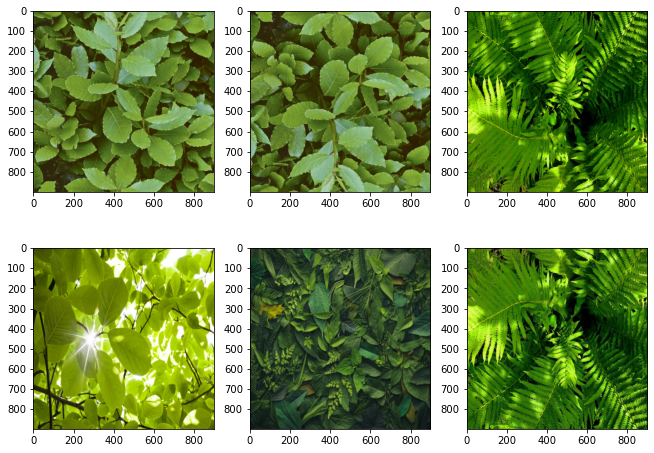

In [325]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_3.jpg")
img_D = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_4.jpg")
img_E = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_1_vertical_flip.jpg") # augmented images
img_F = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_3_vertical_flip.jpg") # augmented images

# display images
print("Training Images - Leaves")
fig, ax = plt.subplots(2,3)
ax[0][0].imshow(img_A)
ax[1][1].imshow(img_B)
ax[0][2].imshow(img_C)
ax[1][0].imshow(img_D)
ax[0][1].imshow(img_E)
ax[1][2].imshow(img_F)
plt.show()

Testing Images - Leaves


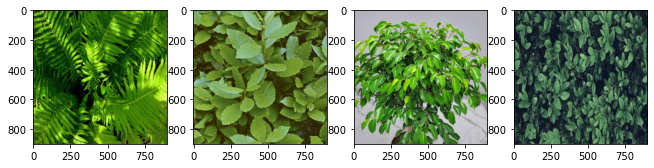

In [326]:
rcParams['figure.figsize'] = 11,8 # graph size

print("Testing Images - Leaves")
img_A = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_3.jpg")
img_D = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_4.jpg")
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
ax[3].imshow(img_D)
plt.show()

### Predicting - Leaves

In [327]:
image_rgb_dict = get_map('leaves')
image_rgb_dict = predict_values_with_trees(image_rgb_dict)
paint_image('leaves_result',image_rgb_dict)

### Training - Wood

In [328]:
# Hyperparameters
NUM_COLUMNS = 30 # predicting a number columns of pixels at a time

# getting the training and test sets 
x_train, y_train = get_data(color = None, set_type = "Train", method = "tree", image = "wood")
x_test, y_test = get_data(color = None, set_type = "Test", method = "tree", image = "wood")

# training the tree
decision_tree = train_decision_tree(x_train, y_train, min_sample_size = 2500, max_depth = 15)    
    
    
# displaying error
error = calculate_error(x_test, y_test, decision_tree)
print("Decision Tree Error: " + str(error))

Decision Tree Error: 61.60070954127164


#### Training Data/Testing Data - Wood

Training Images - Wood


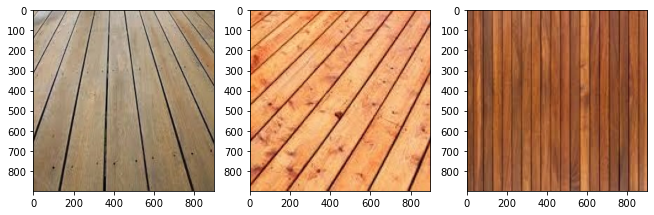

In [329]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_3.jpg")


# display images
print("Training Images - Wood")
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
plt.show()

Testing Images - Wood


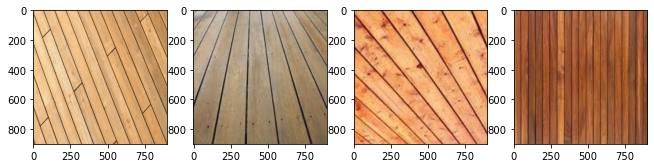

In [330]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_1.jpg") # augmented flipped
img_B = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_2.jpg") # augmented blurred
img_C = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_3.jpg") # augmented flipped
img_D = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_4.jpg") # augmented flipped

# display images
print("Testing Images - Wood")
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
ax[3].imshow(img_D)
plt.show()

### Predicting - Wood

In [331]:
image_rgb_dict = get_map('wood')
image_rgb_dict = predict_values_with_trees(image_rgb_dict)
paint_image('wood_result',image_rgb_dict)

# System 1 - Report

**Training and Testing Data:** I am a firm believer in the more data the better the model (in most cases). But, I want to have *good* training data.
<br>Training data that *teaches* the model important features (specifically of leaves and wood). 
<br>I used data augmentation (flipping/rotating images) to better learn parameters that minimize the error.
<br><br>**Testing Data**: I will being testing my model on random images from the internet and the *Wood_Masked* and *Leaves_Masked* images. 
<br>The model also has never seen these images before.
***
**Structure of Data:** I plan to different possibilities. With my current knowledge I have no clue what is the *best* way to fill in the data. 
<br>I am also going to try to fill the in the missing hole by testing various hyper parameters. 
<br>It could be better to fill in the r-values first compared to the b-values and g-values (who knows?).
***
**Data Preprocessing:** Some ideas I have are to mean center the data and normalize the data between 0 and 1. 
<br>It turns out the best way to normalize this data is just to divide all the pixel values by 255 because that is the max value for red, green, and blue. 
***
**Model, Models, Modeling:** I used one decision tree to predict each pixel value.
***
**Boostrapping:** To minimize bootstrapping, which will minimize error, you can fill in half the image from the left and then fill in the other half from the right. 
<br>This minimizes bootstrapping because it prevents us from using many more predicted values as input to predict more values. In my case, this was the biggest issue.
<br>I was most accurate filling in the edge pixels in the hole of the image. When it came to filling out anything else, my model was not the best.
***
**Measuring Loss:** I am measuring loss using the average of the absolute error.
<br><br>**Visual Quality:** The loss from my three models was relatively low. From the model's point of view it did an excellent job minimizing error.
<br>But just because the loss is low does not mean we will have an accurate inpainting. 
<br>Whatever the model 'thinks' is correct is how it fills in the image.
<br>A 'correct' model has a low loss, but this does not mean that it will also fill in the image realistically.
<br>So the numerical loss does not exactly correspond with the visual quality. 
***
**Training:** To build a model that generalizes well/does not overfit is extremely important for good results.
<br>In this project, I used multiple images from the internet and data augmentation.
<br>I flipped, blurred (added noise), and rotated some of the images in the test and training sets.
<br>This extra infomration can help the model understand the correlation between many pixels.
<br>But this can also harm the model and increase the risk of overfitting.
***
**Assessing Your Models:** To see if my model is accomplishing the desired task the image should 'somewhat' look the same as its surroundings. 
<br>I also could compare my model's results to a pre-made pytorch or tensorflow model.

# System 1 - Results

System 1 - Decision Tree


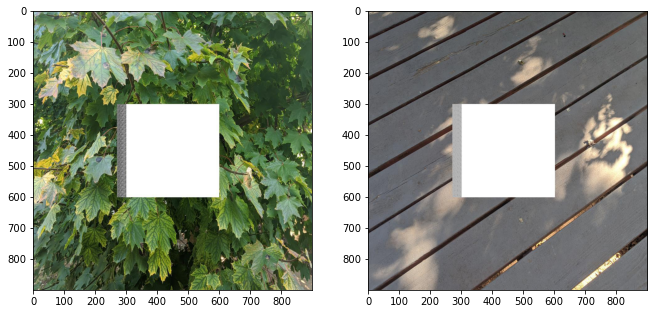

In [332]:
rcParams['figure.figsize'] = 11,8 # graph size

print("System 1 - Decision Tree")
img_A = mpimg.imread(str(cwd) + r"/Final Results/Leaves - Tree.jpg")
img_B = mpimg.imread(str(cwd) + r"/Final Results/Wood - Tree.jpg")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

I did not fill in the rest of the image because it would have just filled in a solid color.
<br>Mhy results are not ideal, and there is a slight change between the predicted pixels in both images.
<br>I will take any amount of progress, but I am not that happt with this progress.
<br>I did get a better result with batch gradient descent in system 2.
<br>The hardest part of the decision tree was the compuation time calculating the importance of each feature.

# System 2 - Code

In [113]:
def sigmoid_prediction(x_data):
    """
    Purpose - calculates the sigmoid vector 
    for an given x vector
    
    Parameters:
    x_data - an ndarray of shape (number of features x number of data points)
    
    Returns:
    prediction_vector - an ndarray of shape (1 x number of data points)
    """
    
    prediction_vector = 1 / (1 + (math.e ** -x_data))

    return prediction_vector

def compute_logistic_error(w_vector, x_data, y_data):
    """
    Parameters: 
    w_vector - the weights learned by the model to guess the output y_data
    x_data ndarray of specific shape
    y_data - ndarray specific shape
    
    Returns:
    The logistic error of the probabilities
    
    Purpose:
    To calculate the logistic error for a dataset
    """
    # taking the dot product 
    probabilities = np.dot(x_data,w_vector)
    
    # making sure these are ndarrays
    probabilities = np.array(probabilities)
    y_data = np.array(y_data)
    
    # changing all -1 to 0 for the calculation
    y_data[y_data == -1] = 0
    
    # logistic error formula vectorized
    to_sum = (-1 * y_data * np.log(probabilities)) - ((1 - y_data) * np.log(1 - probabilities))

    # removing any -inf, inf, or nans
    to_sum = to_sum[~np.isnan(to_sum)] 
    to_sum = to_sum[np.isfinite(to_sum)]

    # we cannot calculate an error
    if len(to_sum) == 0:
        return 0
    
    error = (1/len(to_sum)) * np.sum(to_sum)
    
    return error

def stochastic_gradient_descent(x_train, y_train, y_train_sigmoid, x_test, y_test, color, image, show = True, max_epochs = None):
    """
    Parameters:
    All of the training and test
    sets needed for training
    
    color - a string the tells us what training
    data we are collecting for a certain r,g,b color
    
    image - to specift number of epochs
    based on the color from one of the images
    
    Returns:
    w_vector - our learn weights from the model
    
    Purpose:
    To learn our parameters
    """
    # making a random guess [0.34,0.67,12,...,.434]
    w_vector = np.zeros(x_train.shape[1])
    
    # hyperparamters - learning rate
    alpha = ALPHA

    # let's keep track of the errors
    errors = {"Train Error": [], "Test Error": []}

    # max number of epochs
    # we do not need to train as much 
    # for the other colors
    if max_epochs == None and image == 'leaf':
        if color == 'green':
            max_epochs = len(x_train) * 2
        else:
            max_epochs = int(len(x_train) * (1/4))
    elif max_epochs == None and image == 'wood':
        if color == 'red':
            max_epochs = len(x_train) * 2
        else:
            max_epochs = int(len(x_train) * (1/4))

    # take off factor for batch gradient descent
    take_off = 0
    
    while max_epochs != 0:

        # decrement epochs
        max_epochs -= 1

        # The stochastic part of gradient descent 
        # randomly chosing one data point
        random_index = random.randint(0,len(x_train)-1)
        f_xi = y_train_sigmoid[random_index]
        y_i = y_train[random_index]
        x_i = x_train[random_index]

        # performing an update on the w_vector
        if (max_epochs % BATCH_SIZE) == 0:
            w_vector = w_vector - take_off # apply the update
            take_off = 0 # reset the take_off factor to zero
        else:
            take_off += (alpha * (f_xi - y_i)) * x_i
         
        # gathering errors
        train_error = compute_logistic_error(w_vector, x_train, y_train)
        test_error = compute_logistic_error(w_vector, x_test, y_test)

        # block of code add the error to the list of errors
        errors["Train Error"].append(train_error)
        errors["Test Error"].append(test_error)
        
    if show:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.plot(errors["Train Error"][300:], label = "Train Error", color = 'black')
        ax.plot(errors["Test Error"][300:], label = "Test Error", color = color)
        ax.set_title("Logistic Test/Train Error for Color " + color.upper())
        ax.set_ylabel("Error")
        ax.set_xlabel("Iteration #")
        ax.legend(loc = 'lower left')
        plt.show()

    return w_vector
    
def load_image_with_weights(directory, weights):
    """
    Parameters:
    directory - a string that gives the location of the image
    to be altered
    weights - the weights of the trained models on each of the RGB values
    
    Returns:
    image_rgb_dict - a dictionary that contains a map
    of points and their corresponding RGB values
    red_weights - a ndarray that contains the weights to predict the red pixel value
    green_weights - a ndarray that contains the weights to predict the green pixel value
    blue_weights - a ndarray that contains the weights to predict the blue pixel value
    
    Purpose:
    To load the image in with its weights
    This will allow us to fill the missing hole 
    in the image
    """

    rgb_leaves = get_image_rgb(directory)
    rgb_leaves_partitioned = np.array(np.split(rgb_leaves, 900*NUM_COLUMNS))

    # getting location of pixels
    pixel_locations = []

    # Open an image file
    im = Image.open(get_directory(directory))

    # Load the pixel data into a variable
    pixels = im.load()

    # Get the size of the image
    width, height = im.size
    for x in range(width):
        for y in range(height):
            pixel_locations.append([x,y])

    # getting the same pixel location partitioned
    pixel_locations = np.array(pixel_locations)
    pixel_locations_partitioned = np.split(pixel_locations, 900*NUM_COLUMNS)

    # holds predicted values for the blank part
    # of the image
    image_rgb_dict = dict()

    # creating the dictionary
    for loc,rgb in zip(pixel_locations_partitioned, rgb_leaves_partitioned):

        # coordinates
        X = loc[:,0]
        Y  = loc[:,1]

        # colors
        R = rgb[:,0]
        G = rgb[:,1]
        B = rgb[:,2]

        for x, y, r, g, b in zip(X,Y,R,G,B):
            image_rgb_dict[(x, y)] = (r,g,b) 

    red_weights = np.array(np.split(weights['red'],3))
    green_weights = np.array(np.split(weights['green'],3))
    blue_weights = np.array(np.split(weights['blue'],3))

    return image_rgb_dict, red_weights, green_weights, blue_weights

def predict_save_new_rgb(image_rgb_dict, red_weights, green_weights, blue_weights, SHIFT_FACTOR):
    """
    Parameters:
    image_rgb_dict - a dictionary that contains a map
    that has the coordinates and corresponding RGB colors
    red/green/blue weights - ndarray of the learned weights
    SHIFT_FACTOR - an inteer that tells the model to predict
    the next set of column(s)
    
    Returns:
    image_rgb_dict - a dictionary that contains the new
    predicted RGB values
    
    Purpose:
    To predict the new RGB values with the new
    weights and store them in our 'map'
    """
    # pixels used to predict the next set of pixels
    x_pixel_start = 300 - NUM_COLUMNS + 1 + SHIFT_FACTOR
    x_pixel_end = x_pixel_start + NUM_COLUMNS - 1

    x_pixels = np.array([])
    coords_to_modify = []
    # iterating through dict to find the set of 
    # keys for the prediction
    for key in image_rgb_dict:

        x, y = key
        r, g, b = image_rgb_dict[key]

        if x >= x_pixel_start and x <= x_pixel_end and y >= 300 and y <= 600:
            coords_to_modify.append((x, y))
            if len(x_pixels) != 0:
                x_pixels = np.row_stack((x_pixels,[r,g,b]))
            else:
                x_pixels = copy.deepcopy([r,g,b])

    # calculating prevalence of colors
    red_prob = sigmoid_prediction(np.dot(x_pixels,red_weights))
    green_prob = sigmoid_prediction(np.dot(x_pixels,green_weights))
    blue_prob = sigmoid_prediction(np.dot(x_pixels,blue_weights))

    # calculating each new pixel color based off probabilities
    normalizing_factor = red_prob + blue_prob + green_prob
    red_pixel = (255 * red_prob / normalizing_factor).astype(int)
    green_pixel = (255 * green_prob / normalizing_factor).astype(int) 
    blue_pixel = (255 * blue_prob / normalizing_factor).astype(int) 

    # painting new coordinates to paint into our image_rgb_dict
    for r, g, b, coords in zip(red_pixel, green_pixel, blue_pixel, coords_to_modify):
        image_rgb_dict[coords] = (int(np.mean(r)),int(np.mean(g)),int(np.mean(b)))
        
    return image_rgb_dict

def paint_image(directory, image_rgb_dict):
    """
    Parameters:
    directory - contains the directory of the image we are painting
    image_rgb_dict - contains a map the coorindates and their 
    corresponding RGB values
    
    Returns:
    None
    
    Purpose:
    To paint the image with the predicted
    """
    # Open an image file
    directory = get_directory(directory)

    im = Image.open(directory)

    # Load the pixel data into a variable
    pixels = im.load()

    for key in image_rgb_dict:
        x, y = key
        r, g, b = image_rgb_dict[key]

        pixels[int(x), int(y)] = (r, g, b)

    # Save the modified image
    im.save(directory)

# System 2 - Stochastic Gradient Descent - Soft Classifier

<br>**Input Space**: I am taking a  vector of multiple pixels that each contain red, green, and blue values. 
<br>The vector is an ndarray (n-dimensional array) and each color value is between 0 and 255.
<br>The closer the value is to zero the darker the color, the closer to 255 the lighter the color. 
<br>The max value of of each (r,g,b) pair will be that class color.
<br><br>**Structure:** It is important that this data is structured in the order we read it.
<br>This is *important* because the order of the pixels will determine our future predictions. 
<br><br>**Input Type:** Our input is categorial (3 classes) red, blue, and green.
<br>Each value represents the lightness or darkness of the red, blue, and green categories.
<br><br>**Training Data:** We have basically *unlimited* training data! 
<br>The internet has tons of images where I can download, read, and train our model. 
<br>Images in general have many pixels, so I have to keep in mind how I will group those pixels to feed into the model for learning.
***
**Output Space**: I want to predict single types of pixel values, and groups of pixels.
<br>I want to do this because I would like to see the performance for each types of outputs.
<br><br>**Pixel Issue:** However, one limiting factor may be the excessive computation with each pixel (900 x 900 image = 810,000 pixels). 
<br>To solve this issue I clumped multiple pixels together to predict other clumps of pixels.
<br><br>**Output:** My output will numerical, values between 0 and 255.
<br><br>**Training Data:** In this assignment I will be predicting values for the missing 1/9th middle portion of the provided images.
<br>So, we have two images and each image has 90,000 missing pixels, then we have a total output space of 180,000 missing pixels to fill.
<br>I have used a website, *tinywow* to convert images that I find on the internet to the same dimensions of the images provided in the assignment (900 x 900). 
****
**Model Space:** The types of models that make sense are the ones that can minimize the influence of irrelevant features.
<br>This is important because maybe every pixel might not tell you the *essential* information to predict the next pixels. 
<br>Therefore, it might be worth it to consider *stochastic gradient descent*.
<br><br>**Hard/Easier Models:** Because of so many values I feel that decision trees might not be the best way to perform image inpainting. 
<br>*Space Issue:* The decision tree might be so unbelievably big it could overwhelm my computer. 
<br>*Hyperparameter Issue:* Do I split my tree two ways, three ways or even four ways? Do I have to make a tree for each rgb value?
<br>There are a lot of questions up in the air, so therefore I would prefer *SGD* for image inpainting.
<br><br>**Expressibility:** I hope that the model will be expressive enough to capture the relationship between the input and output. 
<br>As long as my model weighs the irrelevant features with smaller weights and the more important features with larger weights. 
<br><br>**Too Expressive:** I know the model will be to expressive when it fails to generalize to the blank space in the image.
<br>For example, the color green appears a lot in the image, so the model just paints the missing part of the image solid green.
<br>Obviously, the model learned the surrounding color, but it failed to apply various types of green to the image.
***
**Loss:** What makes a model better than another is how well it can generalize to other datasets. A lack of generalization renders a model useless. 
<br>We need a nice loss function that can compare the r,g,b values of pixels that will tell us the *difference* from color to color.
<br>In system 2, I am using the logistic error as my loss function.
<br><br>**Good Result:** A nice result looks like the center of the filled in image blends in with its surrounding pixels.
<br><br>**Training Algorithm:** Depending on our loss function, we need a way of learning or a way of minimizing our error. 
<br>The loss function must be able to tell the difference between pixels are *obviously* are not related.
<br><br>**Potential Problems:** Determining the learning rate, batch size of SDG, number of epochs, and computational power. 

# System 2 - Attempt

### Goal: To make a soft classifier that gives us a probability of a pixel being mostly red, green or blue
- 3 total models will be trained
    - is the pixel red or NOT red?
    - is the pixel green or NOT green?
    - is the pixel blue or NOT blue?

**At the end of training we will combine the results from the three models to determine the pixel values**

One thing to note is that most of the following images have mostly green pixels.
<br>This could mean the red and blue classifiers will not have much variety in their data to train well.
<br>The y-data will be mostly *zeros* because most of the pixels are not mostly red or blue.
<br>So, the green pixel classifier will be a lot more expressive than the other two.

### Training - Leaves

In [74]:
rcParams['figure.figsize'] = 6, 4 # graph size

colors_to_train = ['red','green','blue'] # RGB colors to train
weights = {"red": None, "green": None, "blue": None} # storing learn weights in the dictionary

# Hyperparameters
NUM_COLUMNS = 30 # predicting a number columns of pixels at a time
BATCH_SIZE = 128 # for batch gradient descent
ALPHA = 0.00001 # learning rate for batch gradient descent

for color in colors_to_train:
    
    # getting the training and test sets 
    x_train, y_train, y_train_sigmoid = get_data(color = color, set_type = "Train", method = "SGD", image = "leaf")
    x_test, y_test = get_data(color = color, set_type = "Test", method = "SGD", image = "leaf")
    w_vector = stochastic_gradient_descent(x_train, y_train, y_train_sigmoid, x_test, y_test, color = color, image = 'leaf')
    
    # saving the model in a dictionary - this holds
    # the red, green, blue model
    weights[color] = w_vector

The above graphs make some sense.
<br>When we train a logistic model to detect if a pixel is mostly red or blue we have an error of zero.
<br>This is because the pixels in these images are not mostly red or blue, they are green.
<br>So y-data contains a lot more zeros than ones, so our error is relatively small for both scenarios.
<br>Although these two models might not be meaningful, the model trained on the green color is expressive.
<br>Most of the images in the training data and the testing data have pixels that are mostly green.


#### Training Data/Testing Data - Leaves

Training Images - Leaves


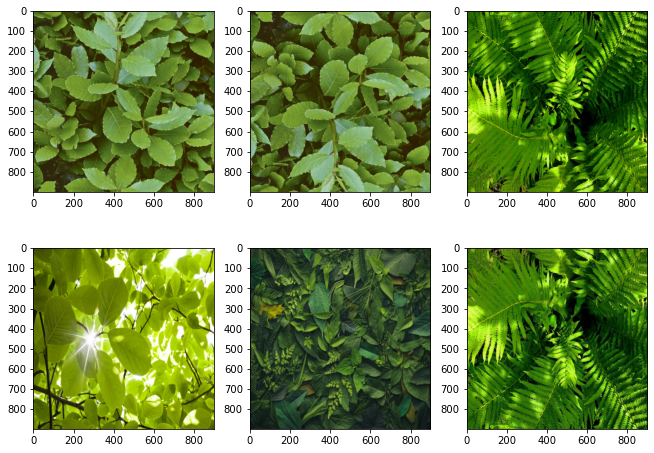

In [43]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_3.jpg")
img_D = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_4.jpg")
img_E = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_1_vertical_flip.jpg") # augmented images
img_F = mpimg.imread(str(cwd) + r"/Leaves_train/leaf_train_3_vertical_flip.jpg") # augmented images

# display images
print("Training Images - Leaves")
fig, ax = plt.subplots(2,3)
ax[0][0].imshow(img_A)
ax[1][1].imshow(img_B)
ax[0][2].imshow(img_C)
ax[1][0].imshow(img_D)
ax[0][1].imshow(img_E)
ax[1][2].imshow(img_F)
plt.show()

Testing Images - Leaves


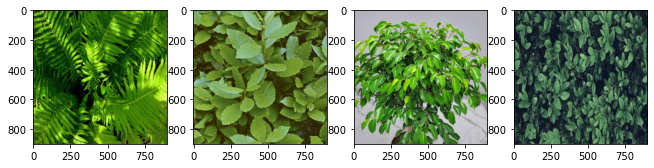

In [44]:
rcParams['figure.figsize'] = 11,8 # graph size

print("Testing Images - Leaves")
img_A = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_3.jpg")
img_D = mpimg.imread(str(cwd) + r"/Leaves_test/leaf_test_4.jpg")
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
ax[3].imshow(img_D)
plt.show()

In the above *middle* graph we can see the model starts to overfit and not become as expressive.
<br>So, let's train the model again, but this time let's set a hard cutoff of ~16,000 epochs

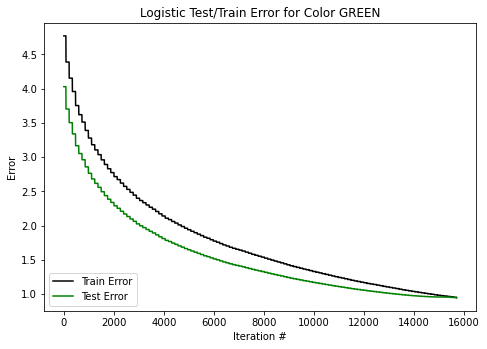

In [52]:
rcParams['figure.figsize'] = 6, 4 # graph size

color = 'green'

# getting the training and test sets 
x_train, y_train, y_train_sigmoid = get_data(color = color, set_type = "Train", method = "SGD", image = "leaf")
x_test, y_test = get_data(color = color, set_type = "Test", method = "SGD", image = "leaf")
w_vector = stochastic_gradient_descent(x_train, y_train, y_train_sigmoid, x_test, y_test, color = color, image = 'leaf',
                                       max_epochs = 16000)

# saving the model in a dictionary - this holds
# the red, green, blue model
weights[color] = w_vector

### Predicting - Leaves

Using the three trained models on each of the *RGB* colors I will predict the prevalence of each of the values.
<br>Then, I will normalize the set of *RGB* values and multiply every value by 255.
<br>In a way this will give me the expected value for each *RGB* color.
<br>The code below uses the three trained models above and puts their learned weight vectors to use!

In [61]:
image_rgb_dict, red_weights, green_weights, blue_weights = load_image_with_weights('leaves_result', weights)
image_rgb_dict = predict_save_new_rgb(image_rgb_dict, red_weights, green_weights, blue_weights, SHIFT_FACTOR = 0)
paint_image('leaves_result',image_rgb_dict)

### Training - Wood

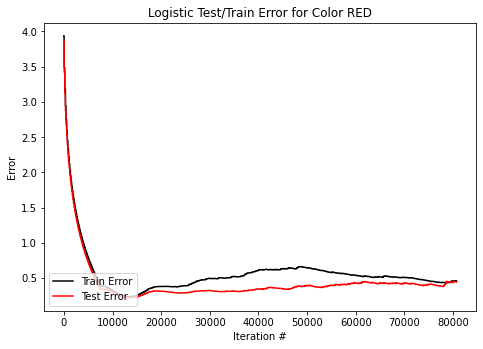

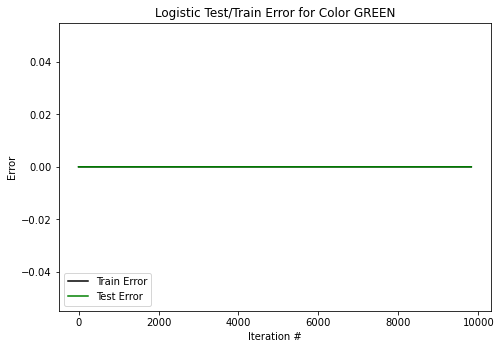

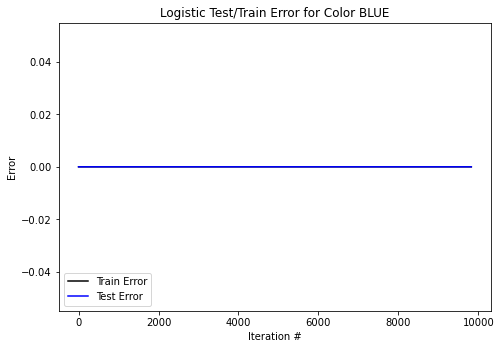

In [96]:
rcParams['figure.figsize'] = 6, 4 # graph size

colors_to_train = ['red','green','blue'] # RGB colors to train
weights = {"red": None, "green": None, "blue": None} # storing learn weights in the dictionary

# Hyperparameters
NUM_COLUMNS = 30 # predicting a number columns of pixels at a time
BATCH_SIZE = 128 # for batch gradient descent
ALPHA = 0.00001 # learning rate for batch gradient descent

for color in colors_to_train:
    
    # getting the training and test sets 
    x_train, y_train, y_train_sigmoid = get_data(color = color, set_type = "Train", method = "SGD", image = "wood")
    x_test, y_test = get_data(color = color, set_type = "Test", method = "SGD", image = "wood")
    w_vector = stochastic_gradient_descent(x_train, y_train, y_train_sigmoid, x_test, y_test, color = color, image = 'wood')
    
    # saving the model in a dictionary - this holds
    # the red, green, blue model
    weights[color] = w_vector

In the above graphs we can see that the red value is most dominant in the wood image.
<br>Our model was easily able to learn the red pixels from the wood images, but not green or blue.
<br>The model that learns the red pixels overfits.
<br>So we need to stop the training early around ~15,000 epochs.

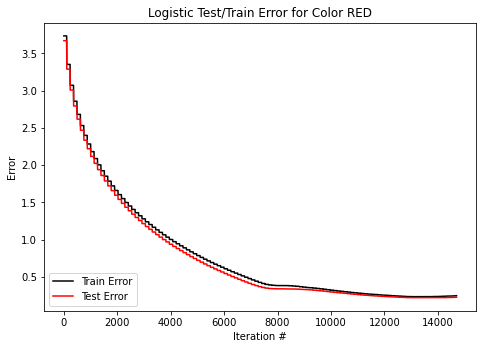

In [130]:
rcParams['figure.figsize'] = 6, 4 # graph size

color = 'red'

# getting the training and test sets 
x_train, y_train, y_train_sigmoid = get_data(color = color, set_type = "Train", method = "SGD", image = "wood")
x_test, y_test = get_data(color = color, set_type = "Test", method = "SGD", image = "wood")
w_vector = stochastic_gradient_descent(x_train, y_train, y_train_sigmoid, x_test, y_test, color = color, image = 'wood',
                                       max_epochs = 15000)

# saving the model in a dictionary - this holds
# the red, green, blue model
weights[color] = w_vector

#### Training Data/Testing Data - Wood

Training Images - Wood


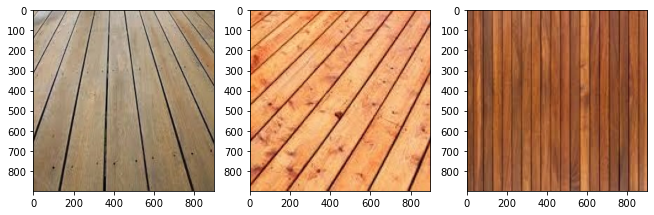

In [119]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_1.jpg")
img_B = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_2.jpg")
img_C = mpimg.imread(str(cwd) + r"/Wood_train/wood_train_3.jpg")


# display images
print("Training Images - Wood")
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
plt.show()

Testing Images - Wood


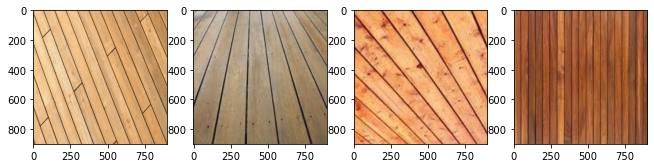

In [121]:
# figure size in inches optional
rcParams['figure.figsize'] = 11,8  # graph size

# read images
img_A = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_1.jpg") # augmented flipped
img_B = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_2.jpg") # augmented blurred
img_C = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_3.jpg") # augmented flipped
img_D = mpimg.imread(str(cwd) + r"/Wood_test/wood_test_4.jpg") # augmented flipped

# display images
print("Testing Images - Wood")
fig, ax = plt.subplots(1,4)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)
ax[3].imshow(img_D)
plt.show()

### Predicting - Wood

In [114]:
image_rgb_dict, red_weights, green_weights, blue_weights = load_image_with_weights('wood_result', weights)
image_rgb_dict = predict_save_new_rgb(image_rgb_dict, red_weights, green_weights, blue_weights, SHIFT_FACTOR = 0)
paint_image('wood_result',image_rgb_dict)

# System 2 - Report

**Training and Testing Data:** I am a firm believer in the more data the better the model (in most cases). But, I want to have *good* training data.
<br>Training data that *teaches* the model important features (specifically of leaves and wood). 
<br>I used data augmentation (flipping/rotating images) to better learn parameters that minimize the error.
<br><br>**Testing Data**: I will being testing my model on random images from the internet and the *Wood_Masked* and *Leaves_Masked* images. 
<br>The model also has never seen these images before.
***
**Structure of Data:** I plan to different possibilities. With my current knowledge I have no clue what is the *best* way to fill in the data. 
<br>So, I am going to try to fill the in the missing hole by testing various hyper parameters. 
<br>It could be better to fill in the r-values first compared to the b-values and g-values (who knows?).
***
**Data Preprocessing:** Some ideas I have are to mean center the data and normalize the data between 0 and 1. 
<br>It turns out the best way to normalize this data is just to divide all the pixel values by 255 because that is the max value for red, green, and blue. 
***
**Model, Models, Modeling:** I used three logistic models that learned their parameters from batch gradient descent.
<br>Each model was in charge of finding the probability of a pixel being red/green/blue. 
***
**Boostrapping:** To minimize bootstrapping, which will minimize error, you can fill in half the image from the left and then fill in the other half from the right. 
<br>This minimizes bootstrapping because it prevents us from using many more predicted values as input to predict more values. In my case, this was the biggest issue.
<br>I was most accurate filling in the edge pixels in the hole from the image. When it came to filling out anything else, my model was not the best.
***
**Measuring Loss:** I am measuring loss using logistic error, which has some nice properties for when y=1 and y=0.
<br><br>**Visual Quality:** The loss from my three models was relatively low. From the model's point of view it did an excellent job minimizing error.
<br>But just because the loss is low does not mean we will have an accurate inpainting. 
<br>Whatever the model 'thinks' is correct is how it fills in the image.
<br>A 'correct' model has a low loss, but this does not mean that it will also fill in the image realistically.
<br>So the numerical loss does not exactly correspond with the visual quality. 
***
**Training:** To build a model that generalizes well/does not overfit is extremely important for good results.
<br>In this project, I used multiple images from the internet and data augmentation.
<br>I flipped, blurred (added noise), and rotated some of the images in the test and training sets.
<br>This extra infomration can help the model understand the correlation between many pixels.
<br>But this can also harm the model and increase the risk of overfitting.
<br>So during training I monitored the loss and used early stopping to stop training the model well before it started to overfit the data.
***
**Assessing Your Models:** To see if my model is accomplishing the desired task the image should 'somewhat' look the same as its surroundings. 
<br>I also could compare my model's results to a pre-made pytorch or tensorflow model.

# System 2 - Results

System 2 - Stochastic Gradient Descent


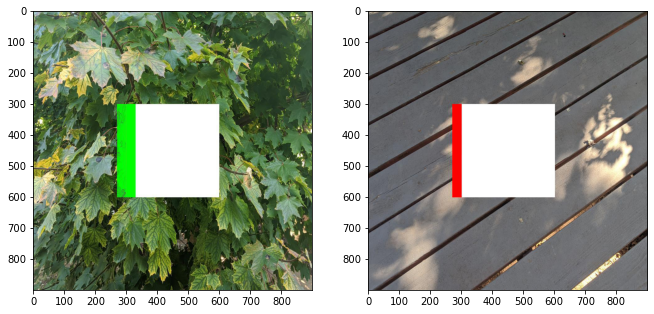

In [128]:
rcParams['figure.figsize'] = 11,8 # graph size

print("System 2 - Stochastic Gradient Descent")
img_A = mpimg.imread(str(cwd) + r"/Final Results/Leaves - SGD.jpg")
img_B = mpimg.imread(str(cwd) + r"/Final Results/Wood - SGD.jpg")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

I did not fill in the rest of the image because it would have just filled in a solid color.
<br>Mhy results are not ideal, but you can see some leaves coming together on the left!
<br>I will take any amount of progress, I am happy with my result on the left but not on the right.
<br>I feel like the red pixels dominated the images and failed to generalize. 

# Bonus 3 (Luna!):

### Hand drawn

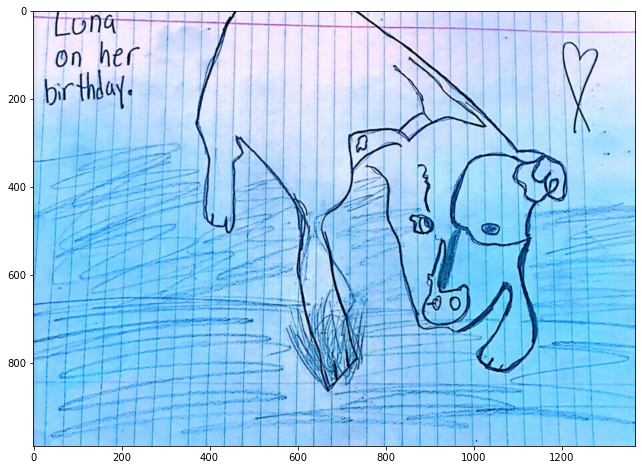

In [341]:
rcParams['figure.figsize'] = 11,8 # graph size

img_A = mpimg.imread(str(cwd) + r"/Luna - Hand drawn.jpg")
fig, ax = plt.subplots(1,1)
ax.imshow(img_A)
plt.show()

### Adobe Illustrator

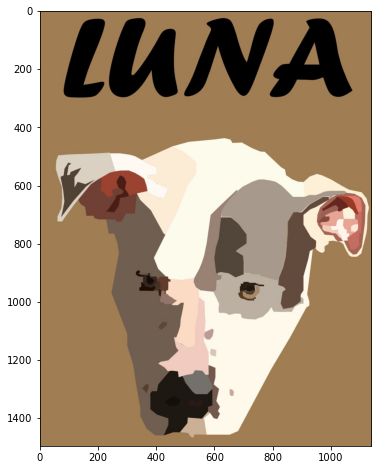

In [340]:
rcParams['figure.figsize'] = 11,8 # graph size

img_A = mpimg.imread(str(cwd) + r"/Luna - Adobe Illustrator.jpg")
fig, ax = plt.subplots(1,1)
ax.imshow(img_A)
plt.show()